<a href="https://colab.research.google.com/github/payelchy580/DIP_Labworks/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
imagefolder = "/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit"

Mounted at /content/drive


In [3]:
# converting into binary image and storing in a folder
import cv2
import matplotlib.pyplot as plt
import os

# Input and output directories
color_image_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit'
binary_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_binary'

# Create output folders if they don’t exist
os.makedirs(binary_folder, exist_ok=True)

# Process each image
for filename in os.listdir(color_image_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(color_image_folder, filename)
        img = cv2.imread(img_path)

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Convert to Binary using thresholding
        _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        cv2.imwrite(os.path.join(binary_folder, filename), binary)

print("All images processed successfully and saved in binary folder as binary form.")

All images processed successfully and saved in binary folder as binary form.


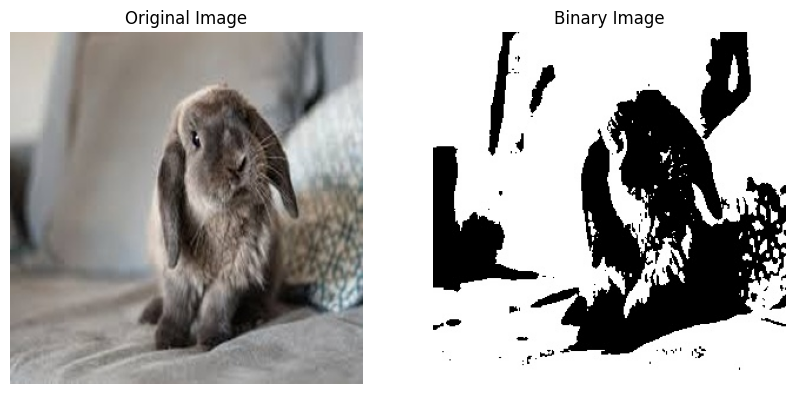

In [15]:
# List all image files
images = [f for f in os.listdir(color_image_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Sort them (optional)
images.sort()

# Choose an index safely
index = 0  # Change this to view other images (e.g., 1, 2, 3, ...)
if index >= len(images):
    index = 0  # fallback

# Construct full paths
original_path = os.path.join(color_image_folder, images[index])
binary_path = os.path.join(binary_folder, images[index])

# Read images
original = mpimg.imread(original_path)
binary = mpimg.imread(binary_path)

# Display both
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(binary, cmap='gray')
axes[1].set_title("Binary Image")
axes[1].axis('off')

plt.show()


✅ All images converted to grayscale and saved successfully.


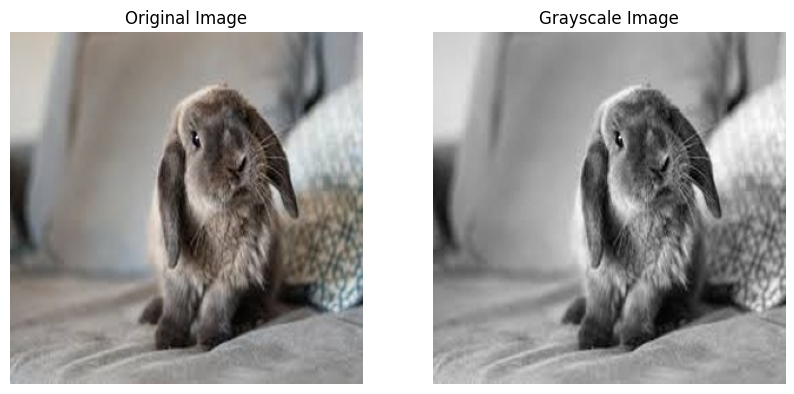

In [24]:
# Input and output folders
color_image_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit'
grayscale_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_grayscale'

# Create output folder if it doesn’t exist
os.makedirs(grayscale_folder, exist_ok=True)

# -----------------------------------------------------------
# Convert each image to grayscale and save
# -----------------------------------------------------------
for filename in os.listdir(color_image_folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(color_image_folder, filename)
        img = cv2.imread(img_path)

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Save grayscale image
        cv2.imwrite(os.path.join(grayscale_folder, filename), gray)

print("✅ All images converted to grayscale and saved successfully.")

# -----------------------------------------------------------
# Display an example
# -----------------------------------------------------------
# List all image files
images = [f for f in os.listdir(color_image_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
images.sort()

# Choose index to display
index = 0  # you can change this to 1, 2, 3...
if index >= len(images):
    index = 0

# Correct variable names
original_path = os.path.join(color_image_folder, images[index])
grayscale_path = os.path.join(grayscale_folder, images[index])

# Read images
original = mpimg.imread(original_path)
gray = cv2.imread(grayscale_path, cv2.IMREAD_GRAYSCALE)  # ✅ ensures proper grayscale reading

# Display both
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(gray, cmap='gray')  # ✅ use cmap='gray' for grayscale display
axes[1].set_title("Grayscale Image")
axes[1].axis('off')

plt.show()


✅ All RGB histograms generated and saved successfully in: /content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_histograms


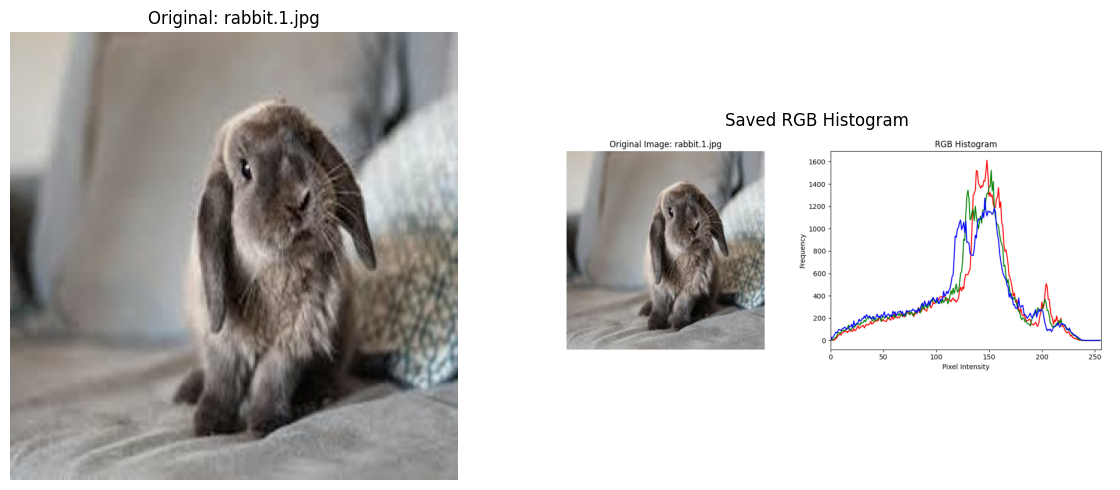

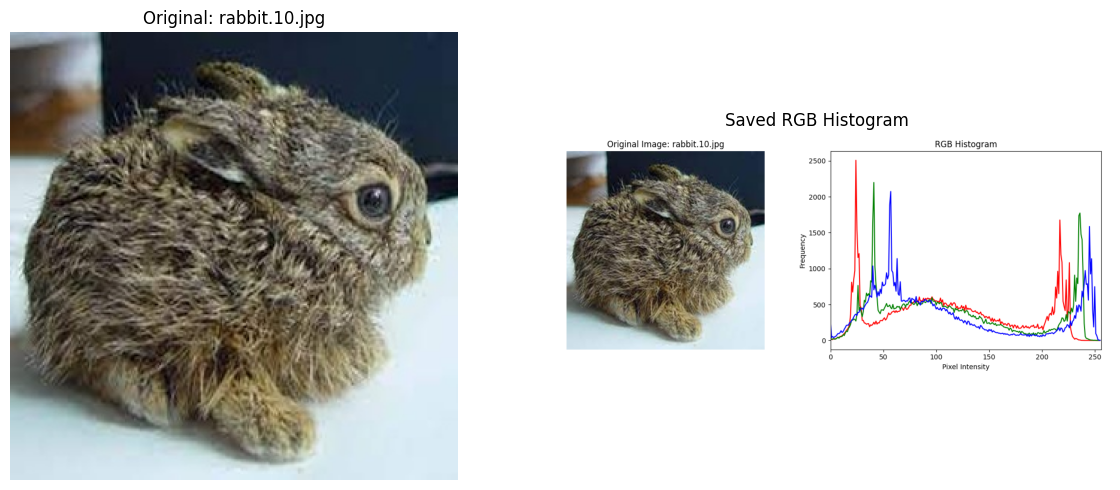

In [26]:
# Input and output folders
color_image_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit'
histogram_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_histograms'

# Create output folder if not exist
os.makedirs(histogram_folder, exist_ok=True)

# List all image files
images = [f for f in os.listdir(color_image_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
images.sort()

# -----------------------------------------------------------
# Step 1: Generate and save histogram plots
# -----------------------------------------------------------
for filename in images:
    img_path = os.path.join(color_image_folder, filename)

    # Read and convert to RGB
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Prepare histogram figure
    plt.figure(figsize=(12, 5))

    # Show the original image
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image: {filename}")
    plt.axis('off')

    # RGB Histogram
    plt.subplot(1, 2, 2)
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.title("RGB Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.tight_layout()

    # Save histogram plot
    save_path = os.path.join(histogram_folder, f"{os.path.splitext(filename)[0]}_hist.png")
    plt.savefig(save_path)
    plt.close()

print("✅ All RGB histograms generated and saved successfully in:", histogram_folder)

# -----------------------------------------------------------
# Step 2: Display two example images with their histograms
# -----------------------------------------------------------
# Choose any two images
example_images = images[:2]  # show first two (change if needed)

for filename in example_images:
    original_path = os.path.join(color_image_folder, filename)
    hist_path = os.path.join(histogram_folder, f"{os.path.splitext(filename)[0]}_hist.png")

    # Read both
    original_img = cv2.cvtColor(cv2.imread(original_path), cv2.COLOR_BGR2RGB)
    hist_img = cv2.cvtColor(cv2.imread(hist_path), cv2.COLOR_BGR2RGB)

    # Display side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(original_img)
    axes[0].set_title(f"Original: {filename}")
    axes[0].axis('off')

    axes[1].imshow(hist_img)
    axes[1].set_title("Saved RGB Histogram")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
